# Analyze the time-series data from the pi
Load in the data, plot it.

## Initalize

In [22]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load Data

In [26]:
def parse_file_line(line):
    '''Parse a line of the input file'''
    split = line.rfind(':')
    
    date_time = datetime.strptime(line[:split], "%Y-%m-%d %H:%M:%S.%f")
    value = int(line[split+1:])
    return (date_time, value)

def load_file(file_path):
    '''Load the time series data from a particular file'''
    with open(file_path, "r") as infile:
        dlist = [parse_file_line(line) for line in infile]
    
    return pd.DataFrame(dlist, columns=['Time', 'PinValue'])


In [27]:
pin07_data = load_file('pin-7-2017-12-25.log')
pin11_data = load_file('pin-11-2017-12-25.log')

## Basic Timeseries Plots

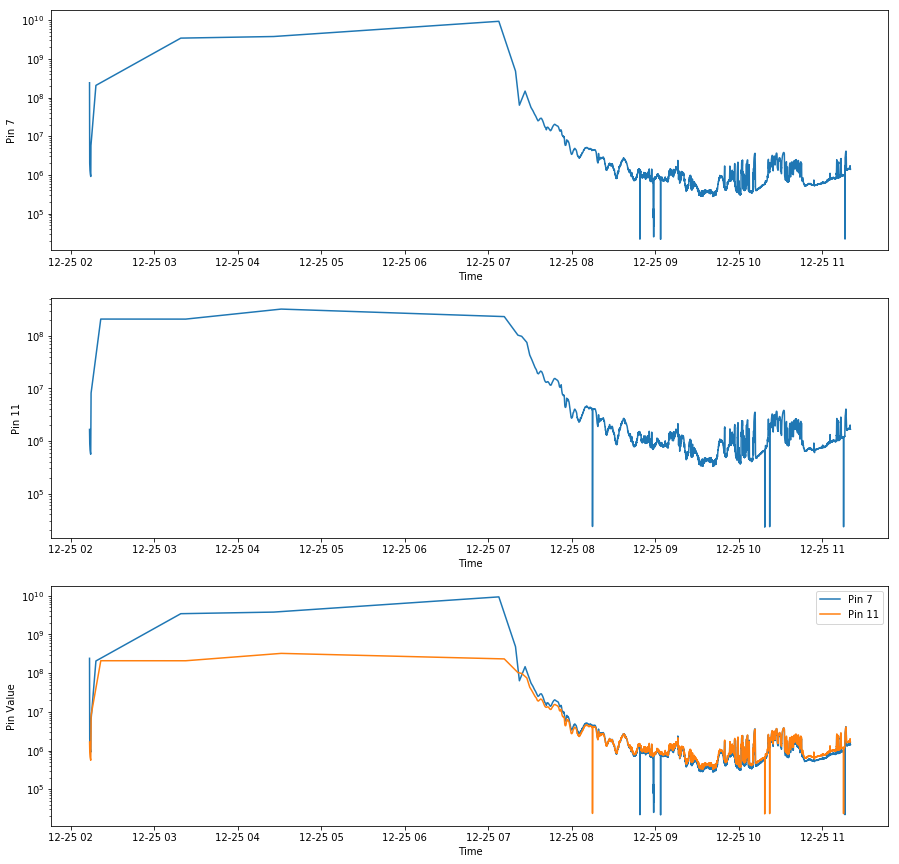

In [43]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(311)
ax.plot(pin07_data.Time, pin07_data.PinValue)
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Pin 7')

ax = plt.subplot(312)
ax.plot(pin11_data.Time, pin11_data.PinValue)
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Pin 11')

ax = plt.subplot(313)
ax.plot(pin07_data.Time, pin07_data.PinValue, label='Pin 7')
ax.plot(pin11_data.Time, pin11_data.PinValue, label='Pin 11')
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Pin Value')
ax.legend()

plt.show()